# Code Testing before Packaging

In [1]:
import sys ; sys.path.append('../src/')
from git_cluster import GIT
from utils import alignPredictedWithTrueLabels, measures_calculator, autoPlot
from dataloaders import Toy_DataLoader as Toy_DataLoader
from dataloaders import Real_DataLoader as Real_DataLoader

## circles

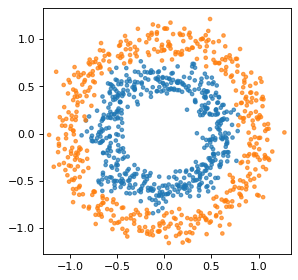

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes
0,0.965027,0.864895,0.965035,0.785846,0.074567,1.0,2


In [3]:
X,Y_true = Toy_DataLoader(name='circles', path="../datasets/toy_datasets").load()

Y_pred = GIT(k=12).fit_predict(X)
autoPlot(X, Y_pred)

Y_pred, Y_true = alignPredictedWithTrueLabels(Y_pred, Y_true)

result = measures_calculator(X, Y_true, Y_pred)
result

## moons

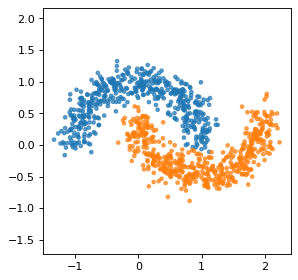

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes
0,0.986013,0.944783,0.986014,0.895695,0.33205,1.0,2


In [4]:
X, Y_true = Toy_DataLoader(name='moons', path="../datasets/toy_datasets").load()

Y_pred = GIT(k=30).fit_predict(X)
autoPlot(X, Y_pred)

Y_pred,Y_true = alignPredictedWithTrueLabels(Y_pred, Y_true)

result = measures_calculator(X, Y_true, Y_pred)
result

## s-set

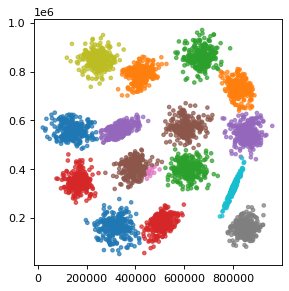

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes
0,0.997563,0.994816,0.996,0.995837,0.683333,1.0,16


In [5]:
X, Y_true = Toy_DataLoader(name='s-set', path="../datasets/toy_datasets").load()

Y_pred = GIT(k=10,target_ratio=[1 for i in range(15)]).fit_predict(X)

autoPlot(X, Y_pred)
Y_pred, Y_true = alignPredictedWithTrueLabels(Y_pred, Y_true)

result = measures_calculator(X, Y_true, Y_pred)
result

## smile

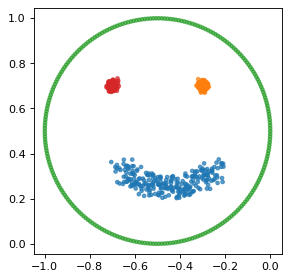

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes
0,1.0,1.0,1.0,1.0,0.505969,1.0,4


In [6]:
X, Y_true = Toy_DataLoader(name='smile', path="../datasets/toy_datasets").load()

Y_pred = GIT(k=20).fit_predict(X)

autoPlot(X, Y_pred)
Y_pred, Y_true = alignPredictedWithTrueLabels(Y_pred, Y_true)

result = measures_calculator(X, Y_true, Y_pred)
result

## Iris

In [7]:
X, Y_true = Real_DataLoader(name='iris', path="../datasets/real_datasets").load()

Y_pred = GIT(k=15, 
             target_ratio=[ 1., 1,1]).fit_predict(X)

Y_pred,Y_true = alignPredictedWithTrueLabels(Y_pred, Y_true)
result = measures_calculator(X, Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes
0,0.876847,0.706006,0.88,0.756087,0.545451,1.0,3


## Impossible

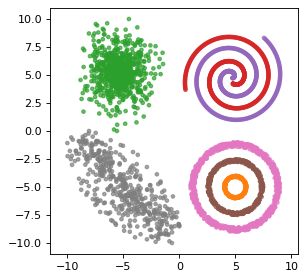

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes
0,1.0,1.0,1.0,1.0,0.235705,1.0,7


In [8]:
X, Y_true = Toy_DataLoader(name='impossible', 
                            path="../datasets/toy_datasets").load()

Y_pred = GIT(k=9, target_ratio=[2, 2, 1, 1, 1, 1, 1]).fit_predict(X)
autoPlot(X, Y_pred)

Y_pred, Y_true = alignPredictedWithTrueLabels(Y_pred, Y_true)
result = measures_calculator(X, Y_true, Y_pred)
result

## More Experiments 

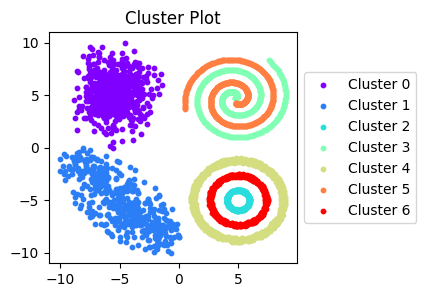

Cluster Label,0,4,1,3,5,6,2
Size,893.00,676.0,450.00,450.00,450.00,406.00,270.00
Percentage,24.84,18.8,12.52,12.52,12.52,11.29,7.51


In [9]:
# Load the data
X, Y_true = Toy_DataLoader(name='impossible', 
                            path="../datasets/toy_datasets").load()

# Create an instance of the GIT clustering 
git = GIT(k=9, target_ratio=[2, 1, 1, 1, 1, 1, 1])

# Apply the GIT algorithm to predict the clusters in the data
Y_pred = git.fit_predict(X)

# Plot the clusters and summarize their statistics in a DataFrame
git.plot_and_summarize_clusters(X, Y_pred)

In [10]:
result = measures_calculator(X, Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes
0,0.373574,1.0,0.373574,1.0,0.235705,1.0,7


## Fish Dataset

In [14]:
# Laod Fish data
X_fish, Y_fish_true = Real_DataLoader(name='fish', path="../datasets/real_datasets").load()

# Create an instance of the GIT clustering
git = GIT(k=20, target_ratio=[2, 2, 1, 1, 2, 1, 1])

# Apply the GIT algorithm to predict the clusters in the data
Y_fish_pred_git = git.fit_predict(X_fish)

# Align the predicted labels with the true labels for accurate evaluation
Y_fish_pred_git, Y_fish_true = alignPredictedWithTrueLabels(Y_fish_pred_git, Y_fish_true)

# Calculate various clustering metrics to evaluate the performance
perf_metrics_git_fish = measures_calculator(X_fish, Y_fish_pred_git, Y_fish_true)

# Store additional information about the algorithm and dataset in the result
perf_metrics_git_fish["Algo"] = git.__class__.__name__
perf_metrics_git_fish["dataset"] = "fish"

perf_metrics_git_fish

,f1,ARI,ACC,NMI,Silhouette,cover_rate,classes,Algo,dataset
0,0.601962,0.191701,0.503145,0.348263,-0.204943,1.0,7,GIT,fish
